# Binnings Technics

Binning, atau bucketing, adalah teknik rekayasa fitur yang mengelompokkan data numerik menjadi kelompok atau bin yang lebih kecil. Ini sering digunakan untuk mengubah data numerik menjadi data kategorikal, membantu mempermudah analisis dan pemodela

## Ambil data iris asli

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2
               5.4               3.9                1.7               0.4
               4.6               3.4                1.4               0.3
               5.0               3.4                1.5               0.2
               4.4               2.9                1.4               0.2
               4.9               3.1                1.5               0.1
               5.4               3.7                1.5               0.2
               4.8               3.4                1.6               0.2
               4.8               3.0  

### Klasifikasi Naive Bayes pada Data Iris asli

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



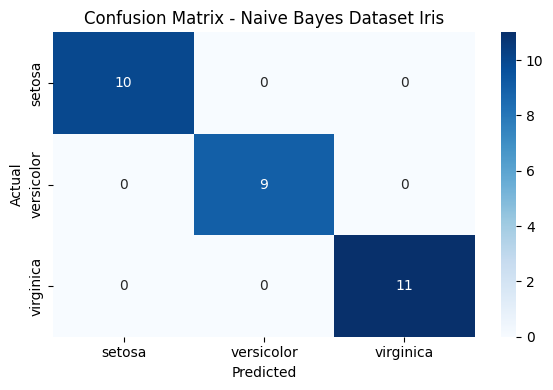

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Dataset Iris')
plt.tight_layout()
plt.show()


### Klasifikasi Decision Tree pada Data Iris asli

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



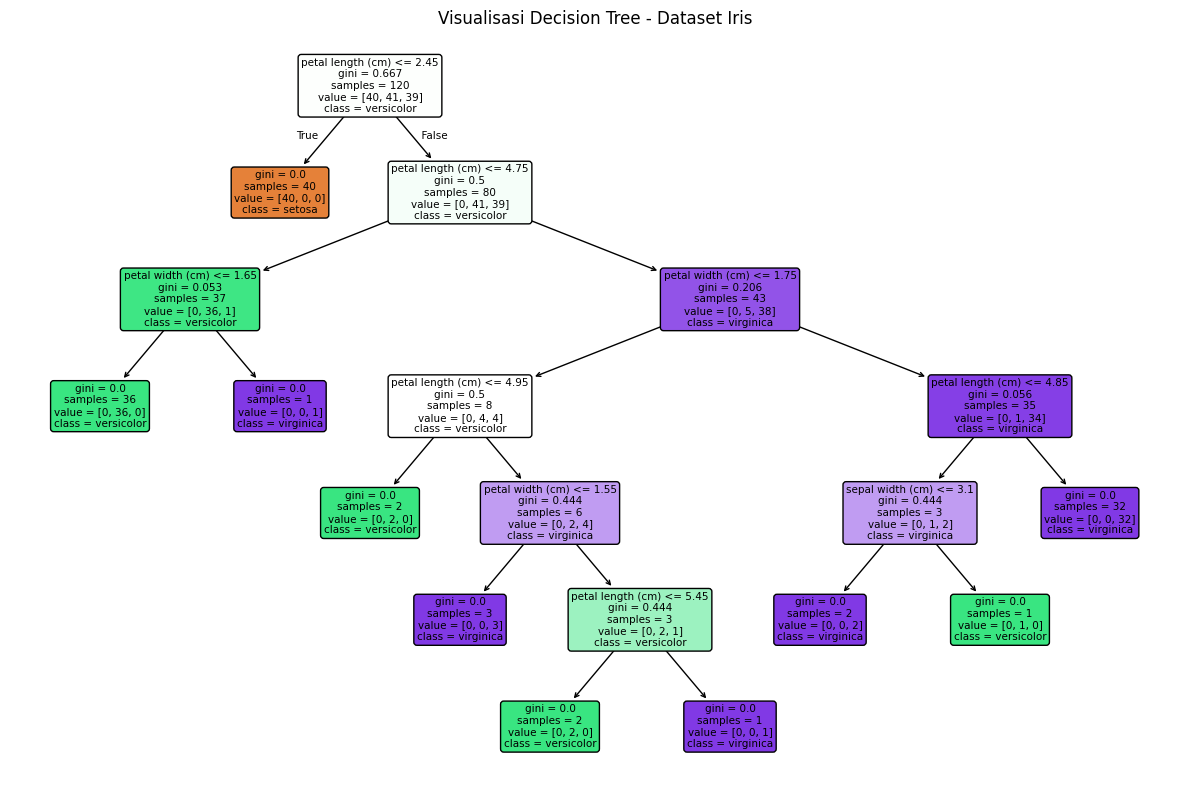

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# -------------------------
# Visualisasi Pohon Keputusan
# -------------------------
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.tight_layout()
plt.show()

## Diskritisasi Dataset Iris

### Diskritisasi Dataset Iris menggunakan K-Means

Program ini memuat dataset *Iris* dan menerapkan algoritma *KMeans clustering* secara terpisah pada masing-masing fitur (panjang dan lebar sepal serta petal) untuk mengelompokkan nilai-nilainya ke dalam 4 klaster. Setiap hasil klaster diberi label huruf (‘A’, ‘B’, ‘C’, atau ‘D’) sebagai pengganti angka klaster. Program kemudian membuat sebuah DataFrame baru yang hanya berisi hasil klasterisasi untuk setiap fitur, dan menambahkan kolom `class` di awal untuk menunjukkan label asli spesies bunga (`setosa`, `versicolor`, atau `virginica`). Terakhir, hasil ini ditampilkan dalam bentuk tabel tanpa indeks baris.


In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hanya berisi hasil clustering
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label di bagian depan
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil klaster
print(df_kmeans.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            C           D            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           D            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           C            B           B
    setosa            B           D            B           B
    setosa            B 

### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means

Program ini memuat dataset Iris dan melakukan klasterisasi menggunakan algoritma KMeans secara terpisah pada setiap fitur (panjang dan lebar sepal serta petal), lalu mengonversi hasil klaster menjadi label huruf (‘A’–‘D’). Hasil klaster ini digunakan sebagai fitur input untuk klasifikasi menggunakan algoritma **Categorical Naive Bayes**. Data dibagi menjadi data latih dan uji, kemudian model dilatih untuk memprediksi jenis spesies bunga. Akhirnya, program mencetak akurasi dan laporan klasifikasi dari hasil prediksi.


In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hasil clustering per fitur
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan K-Means

Program ini memuat dataset **Iris**, lalu menerapkan **KMeans clustering** secara terpisah pada setiap fitur untuk mengelompokkan nilai menjadi 4 klaster, yang kemudian diubah menjadi label kategori ('A'–'D'). Hasil klasterisasi ini digunakan sebagai fitur masukan untuk membangun model klasifikasi menggunakan algoritma **Decision Tree**. Setelah data dikodekan dan dibagi menjadi data latih dan uji, model dilatih untuk memprediksi jenis spesies bunga. Program kemudian mencetak akurasi dan laporan klasifikasi, serta menampilkan **visualisasi pohon keputusan** yang terbentuk dari proses pelatihan.


Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



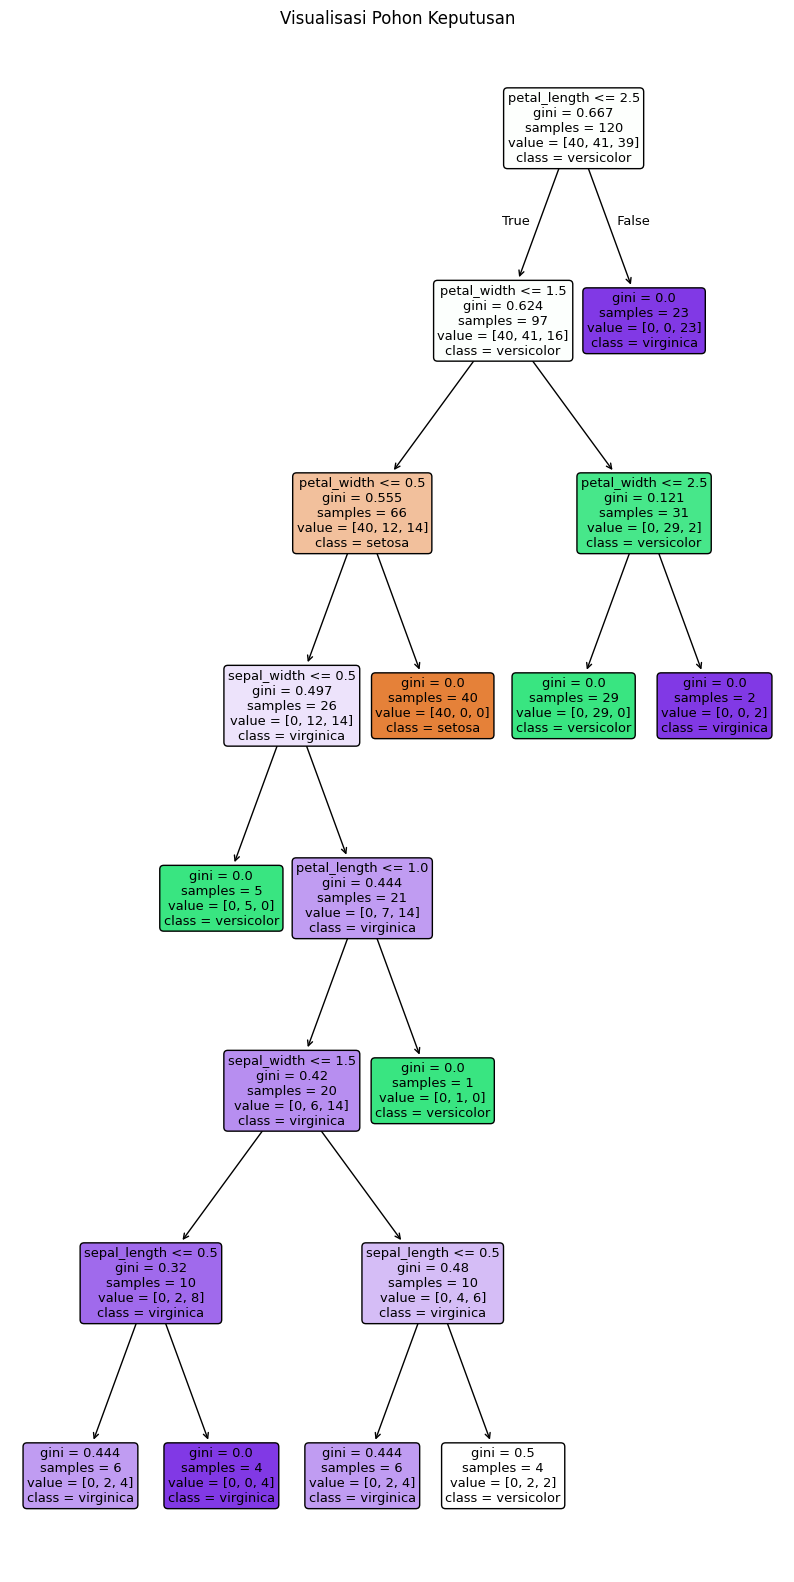

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hasil clustering per fitur
kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label
kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


In [7]:
# Simpan ke file CSV
df_kmeans.to_csv('diskritisasi_iris_kmeans.csv', index=False)

### Diskritisasi Dataset Iris menggunakan Equal-Width

Program ini memuat dataset **Iris** dan melakukan proses **diskritisasi manual** menggunakan metode **equal-width binning** pada setiap fitur numerik. Setiap fitur dibagi menjadi 4 interval dengan lebar yang sama, lalu setiap nilai diklasifikasikan ke dalam salah satu dari 4 bin yang dilabeli huruf ‘A’ hingga ‘D’. Hasil diskritisasi ini disusun dalam sebuah DataFrame baru, dan kolom label kelas asli (`setosa`, `versicolor`, `virginica`) ditambahkan di awal. Terakhir, hasil ditampilkan dalam bentuk tabel tanpa indeks.


In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Mapping indeks bin ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi diskritisasi equal-width manual
def equiwidth_discretize(arr, m):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m

    # Buat batas-batas bin
    bin_edges = [min_val + i * width for i in range(m + 1)]

    # Diskritisasi: untuk setiap nilai, cari bin index
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Buat DataFrame hasil diskritisasi manual
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df['sepal length (cm)'], 4),
    'sepal_width':  equiwidth_discretize(df['sepal width (cm)'], 4),
    'petal_length': equiwidth_discretize(df['petal length (cm)'], 4),
    'petal_width':  equiwidth_discretize(df['petal width (cm)'], 4)
})

# Tambahkan label kelas di depan
df_equal_width.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_width.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           D            A           A
    setosa            B 

In [9]:
# Simpan ke file CSV
df_equal_width.to_csv('diskritisasi_iris_equalwidth.csv', index=False)

### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width

Potongan program ini melakukan **klasifikasi** terhadap hasil **diskritisasi equal-width** pada dataset *Iris* menggunakan algoritma **Categorical Naive Bayes**. Berikut penjelasan singkatnya:

Setelah data fitur kategori ('A'–'D') diubah menjadi angka melalui proses encoding, data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian. Model **CategoricalNB** dilatih menggunakan data pelatihan tersebut, kemudian digunakan untuk memprediksi kelas spesies bunga pada data uji. Terakhir, program mencetak **akurasi** dan **laporan klasifikasi** (precision, recall, f1-score) sebagai hasil evaluasi kinerja model.


In [10]:
# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width

Potongan program ini melakukan **klasifikasi** terhadap data *Iris* yang telah didiskritisasi menggunakan metode **equal-width binning**, dengan algoritma **Decision Tree**. Setelah mengonversi kategori (‘A’–‘D’) menjadi angka, data dibagi menjadi 80% data latih dan 20% data uji. Model pohon keputusan dilatih menggunakan data latih, kemudian digunakan untuk memprediksi kelas spesies bunga pada data uji. Hasil evaluasi berupa **akurasi** dan **laporan klasifikasi** ditampilkan. Program juga menghasilkan **visualisasi pohon keputusan** yang menggambarkan bagaimana fitur-fitur digunakan untuk membedakan antara kelas-kelas bunga.


Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



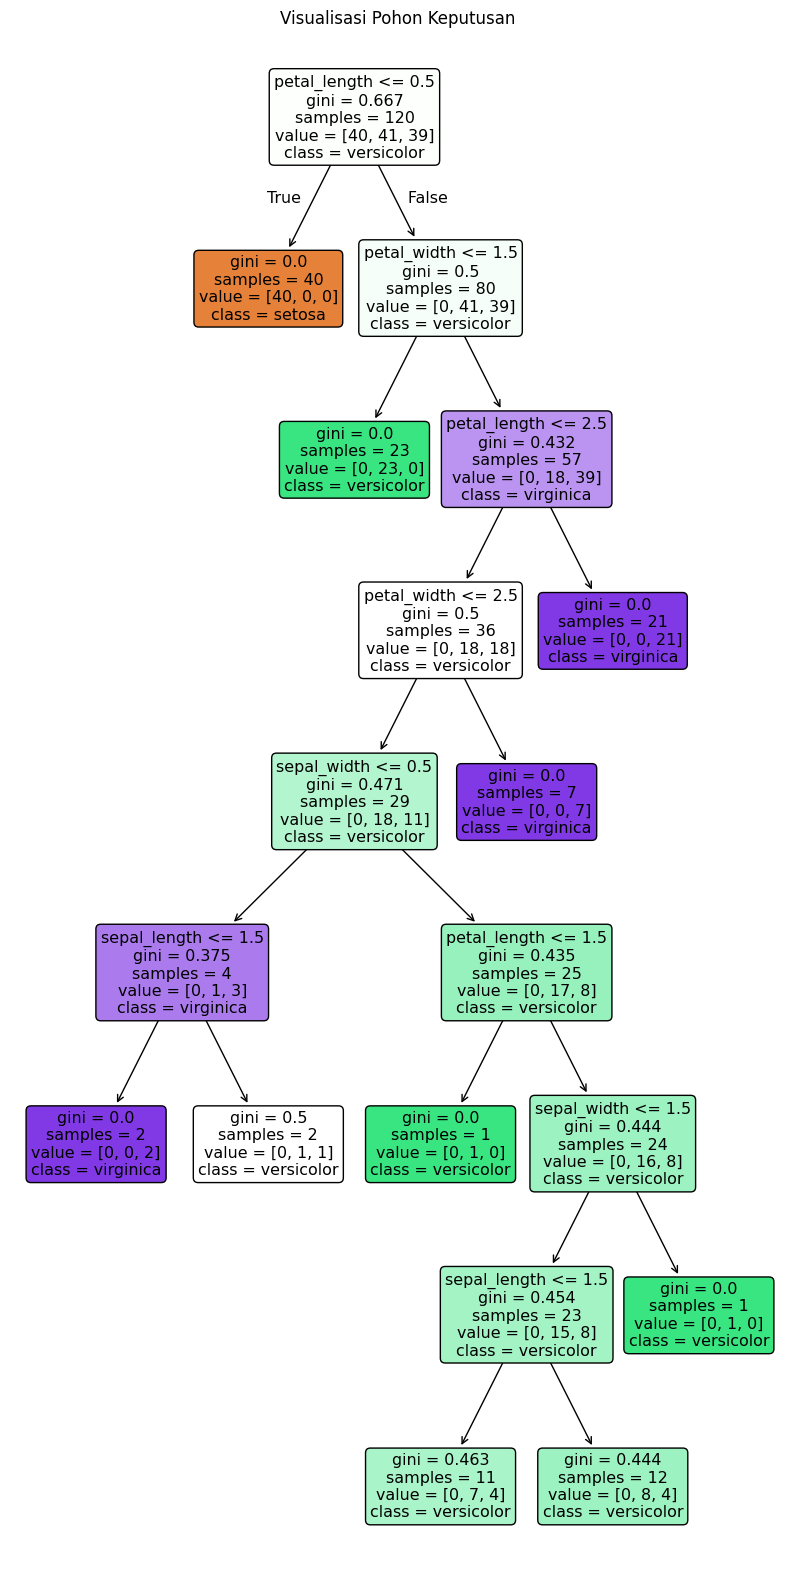

In [11]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


### Diskritisasi Dataset Iris menggunakan Equal-Frequency

Program ini memuat dataset **Iris** dan menerapkan proses **diskritisasi equal-frequency (frekuensi sama)** secara manual pada setiap fitur numerik. Setiap fitur dibagi ke dalam 4 kelompok (*bin*) yang masing-masing berisi jumlah data yang hampir sama. Nilai-nilai dari setiap fitur diklasifikasikan ke dalam bin yang dilabeli huruf ‘A’ hingga ‘D’, berdasarkan urutan nilainya. Hasil diskritisasi disusun dalam sebuah DataFrame baru, lalu ditambahkan kolom label kelas asli (`setosa`, `versicolor`, `virginica`) di bagian depan. Terakhir, hasil akhir ditampilkan dalam bentuk tabel tanpa indeks.


In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target_labels = pd.Series(iris.target).map(lambda i: iris.target_names[i])

# Label huruf untuk masing-masing bin
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi manual untuk equal-frequency discretization
def discretize_cdf(data, m):
    data = list(data)
    data_sorted = sorted(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Hitung batas kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        floor = int(index)
        ceil = floor + 1
        frac = index - floor
        if ceil >= n:
            val = data_sorted[floor]
        else:
            val = data_sorted[floor] + (data_sorted[ceil] - data_sorted[floor]) * frac
        thresholds.append(val)

    thresholds.append(float('inf'))

    # Tentukan label bin untuk setiap nilai
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break

    return labels

# Terapkan discretization ke setiap kolom
df_equal_frequency = pd.DataFrame({
    'sepal_length': discretize_cdf(df['sepal length (cm)'], 4),
    'sepal_width':  discretize_cdf(df['sepal width (cm)'], 4),
    'petal_length': discretize_cdf(df['petal length (cm)'], 4),
    'petal_width':  discretize_cdf(df['petal width (cm)'], 4)
})

# Tambahkan kolom kelas di depan
df_equal_frequency.insert(0, 'class', target_labels)

# Tampilkan hasil
print(df_equal_frequency.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           D            A           A
    setosa            B           D            B           B
    setosa            A           D            A           B
    setosa            A           D            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           D            B           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            C           D            A           A
    setosa            B 

In [13]:
# Simpan ke file CSV
df_equal_frequency.to_csv('diskritisasi_iris_equalfrequency.csv', index=False)

### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Potongan program ini melakukan **klasifikasi** pada data *Iris* yang telah didiskritisasi menggunakan metode **equal-frequency binning**, dengan algoritma **Categorical Naive Bayes**.

Nilai kategori hasil diskritisasi ('A'–'D') diubah menjadi angka menggunakan *LabelEncoder*. Data kemudian dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian. Model **CategoricalNB** dilatih pada data latih dan digunakan untuk memprediksi label kelas pada data uji. Terakhir, program mencetak **akurasi** dan **laporan klasifikasi** yang mencakup precision, recall, dan f1-score untuk mengevaluasi performa model.


In [14]:

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Program ini melakukan klasifikasi pada data Iris yang sudah didiskritisasi menggunakan metode equal-frequency binning dengan algoritma Decision Tree. Setelah mengubah nilai kategori (‘A’–‘D’) menjadi angka, data dibagi menjadi 80% data latih dan 20% data uji. Model pohon keputusan dilatih dengan data latih, lalu digunakan untuk memprediksi kelas pada data uji. Program menampilkan akurasi dan laporan klasifikasi untuk menilai performa model, serta menampilkan visualisasi pohon keputusan yang menggambarkan aturan-aturan yang dihasilkan model dalam mengklasifikasikan data.


Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



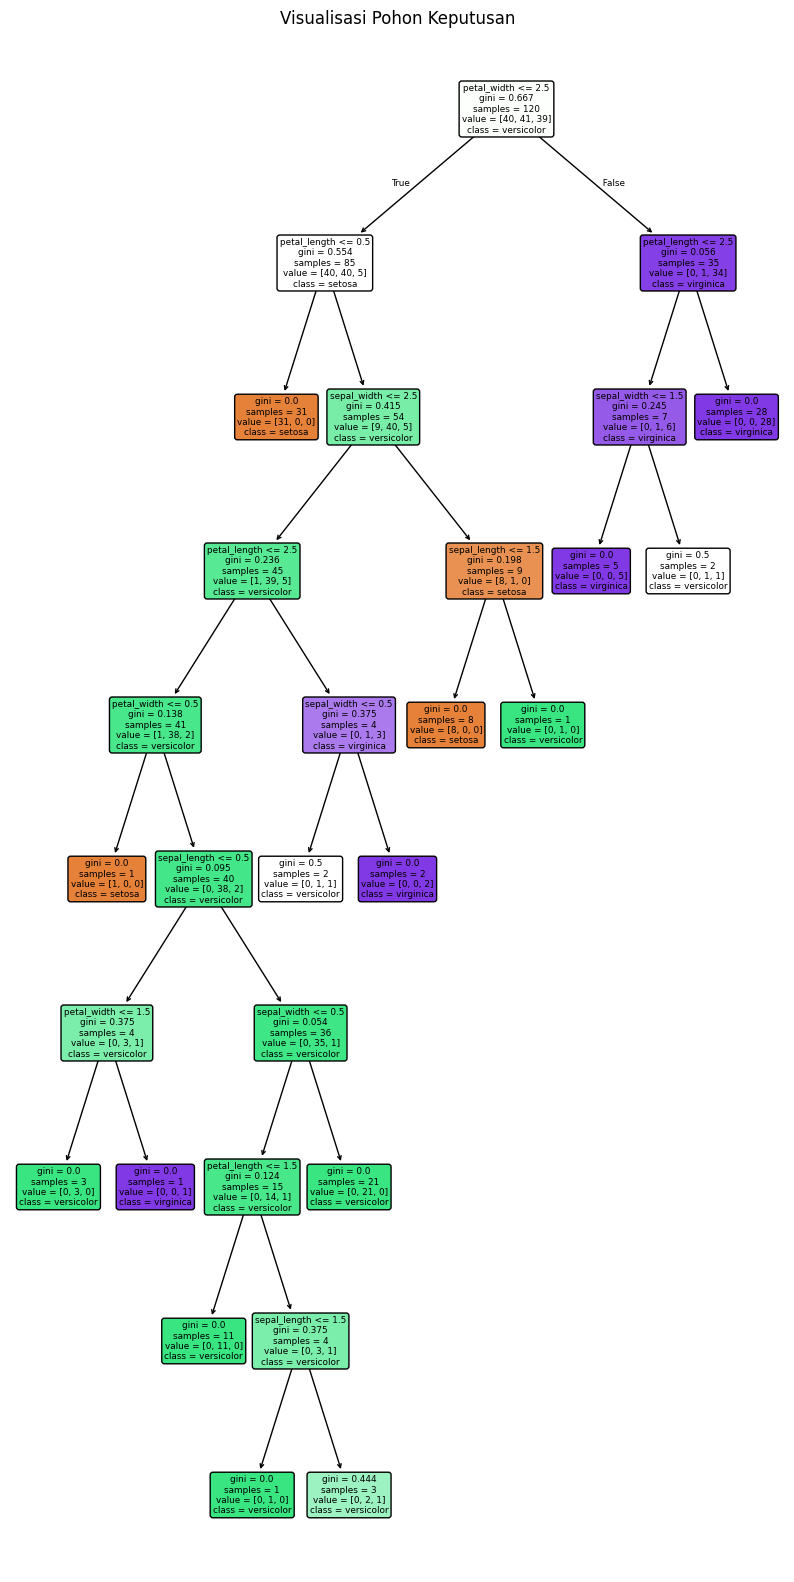

In [15]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()
